In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score,precision_score,recall_score,f1_score


In [6]:
lndf = pd.read_csv("loan_approval_dataset.csv")
lndf.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [7]:
lndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
lndf.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [9]:
lndf.drop(columns=["loan_id"], inplace=True)
lndf.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [10]:
obj_col= lndf.select_dtypes(exclude='Int64').columns
obj_col

Index([' education', ' self_employed', ' loan_status'], dtype='object')

In [11]:
for col in obj_col:
    lndf[col]= lndf[col].str.strip()

In [12]:
lndf.columns = lndf.columns.str.strip()
lndf.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [13]:
lndf.rename(columns={"cibil_score":"credit_score"},inplace=True)
lndf.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [14]:
lndf["Total Wealth"]=  lndf["residential_assets_value"] + lndf["commercial_assets_value"]+ lndf["luxury_assets_value"] +\
    lndf["bank_asset_value"]+lndf["income_annum"]

In [15]:
lndf["Total Wealth"]

0       60300000
1       21100000
2       66800000
3       60900000
4       64800000
          ...   
4264     8400000
4265    23300000
4266    45500000
4267    32900000
4268    86500000
Name: Total Wealth, Length: 4269, dtype: int64

Create and recreate  some categorical columns

In [16]:
def calculate_range(df , col):
    twenty_fifth = df[col].quantile(0.25)
    median = df[col].median()
    seventy_fifth = df[col].quantile(0.75)
    maximum = df[col].max()
    range_list = [0,twenty_fifth,median,seventy_fifth,maximum]
    return range_list
    

In [17]:
wealth_labels = ["Low Class", "Low Middle Class", "High Middle Class", "High Class"]
wealth_bins = calculate_range(lndf, "Total Wealth")
lndf["social_class"] = pd.cut(lndf["Total Wealth"], bins=wealth_bins, labels=wealth_labels)

In [18]:
loan_labels = ["Bronze", "Silver", "Gold", "Platinum"]
loan_bins = calculate_range(lndf, "loan_amount")
lndf["loan_type"]= pd.cut(lndf["loan_amount"], bins=loan_bins, labels=loan_labels)

In [19]:
credit_labels = ["Very Poor","Poor","Fair", "Good", "Excellent"]
credit_bins = [300,500,600,660,780,951]
lndf["credit_rating"] = pd.cut(lndf["credit_score"], bins=credit_bins,labels=credit_labels, include_lowest=True)


In [20]:
loan_term_labels =  ["Short Term", "Intermedate Term", "Long Term"]
loan_term_bins  = [0,2,6,20]
lndf["loan_term_type"] = pd.cut(lndf["loan_term"],bins=loan_term_bins,labels=loan_term_labels,include_lowest=True)

In [21]:
lndf.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,Total Wealth,social_class,loan_type,credit_rating,loan_term_type
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,60300000,High Class,Platinum,Good,Long Term
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,21100000,Low Middle Class,Silver,Very Poor,Long Term
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,66800000,High Class,Platinum,Poor,Long Term
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,60900000,High Class,Platinum,Very Poor,Long Term
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,64800000,High Class,Platinum,Very Poor,Long Term


In [22]:
lndf["loan_term_type"].value_counts()

loan_term_type
Long Term           2928
Intermedate Term     937
Short Term           404
Name: count, dtype: int64

In [23]:
lndf.to_csv("loan_dataset_rev1.csv")

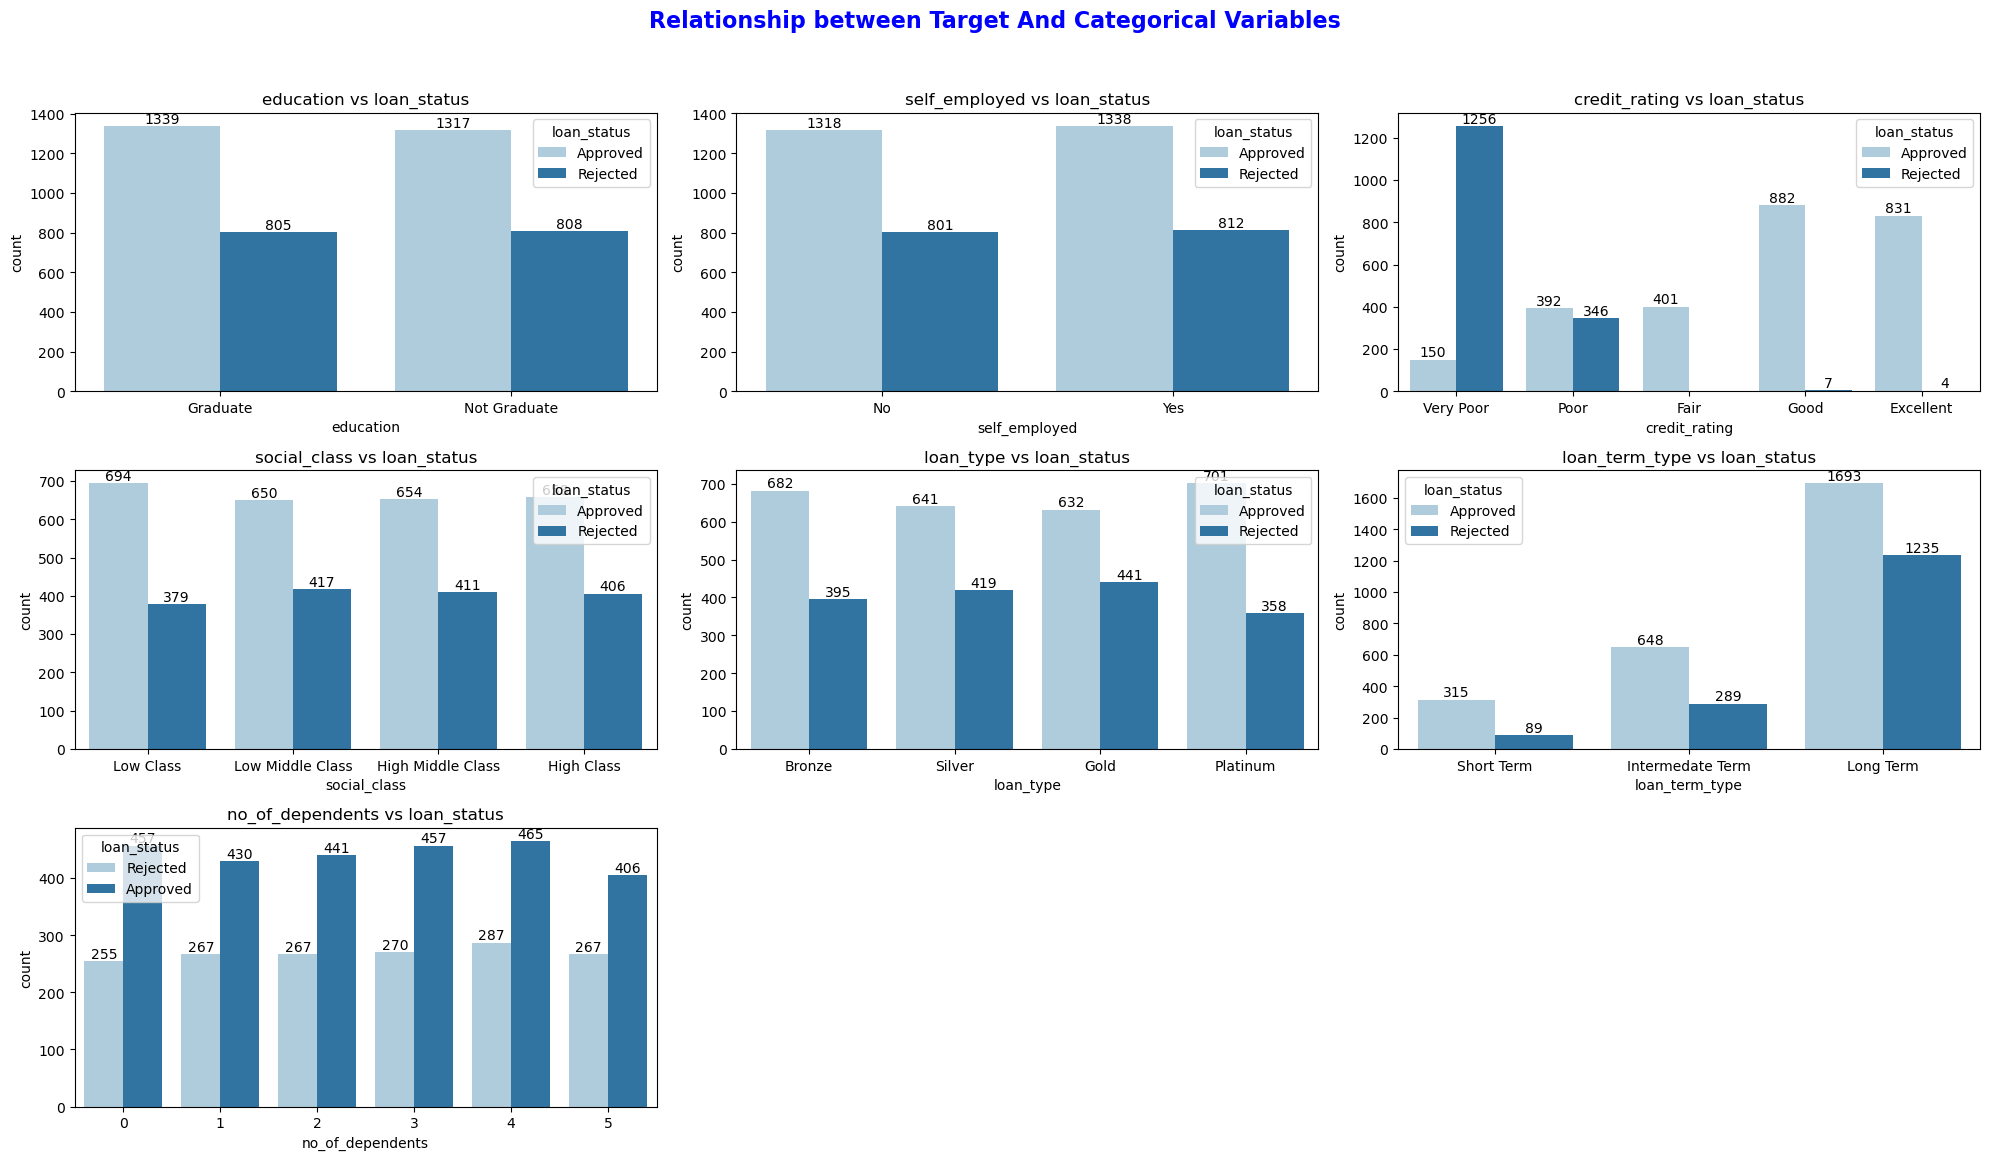

In [24]:
target = "loan_status"
categorical_features = ["education", "self_employed", "credit_rating", "social_class","loan_type","loan_term_type", "no_of_dependents"]
plt.figure(figsize=(20,15))
for i,cat in enumerate(categorical_features,1):
    plt.subplot(4,3,i)
    catplt=sns.countplot(x= cat, data=lndf, hue=target, palette="Paired")
    for con in catplt.containers:
        catplt.bar_label(con)
    plt.title("{} vs {}".format(cat, target))
    plt.tight_layout()
plt.suptitle("Relationship between Target And Categorical Variables",fontsize=16, fontweight="bold", color="blue")
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.show()    

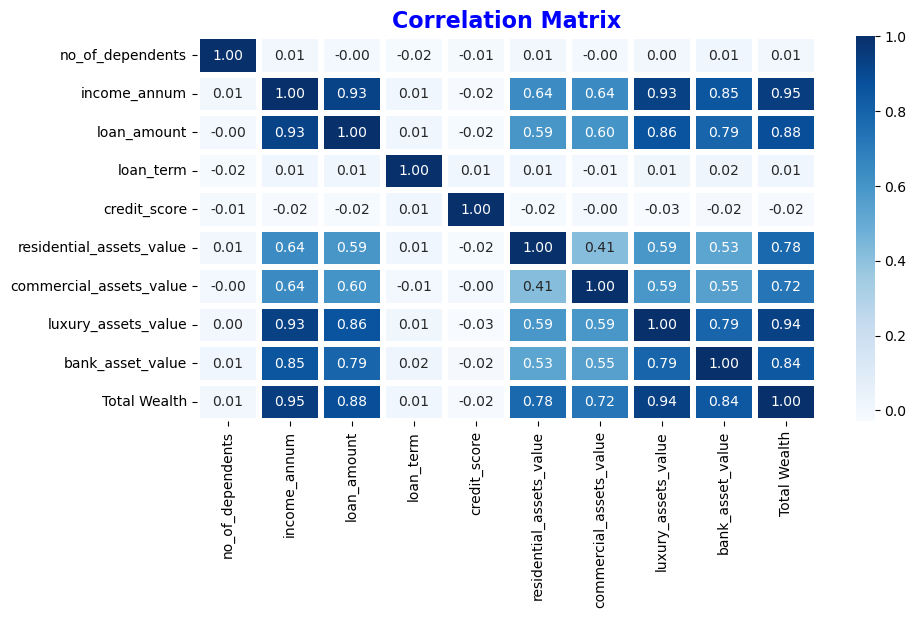

In [25]:
numeric_features =  lndf.select_dtypes(include=["int64", "float64"])
#numeric_features.drop(columns=["loan_id"], inplace=True)

# determine the correlation between numeric features
plt.figure(figsize = (10,5))
sns.heatmap(numeric_features.corr(), annot = True, cmap = "Blues", fmt = ".2f",linewidths=3)
plt.title("Correlation Matrix", fontsize=16, fontweight="bold", color="blue")
plt.show()

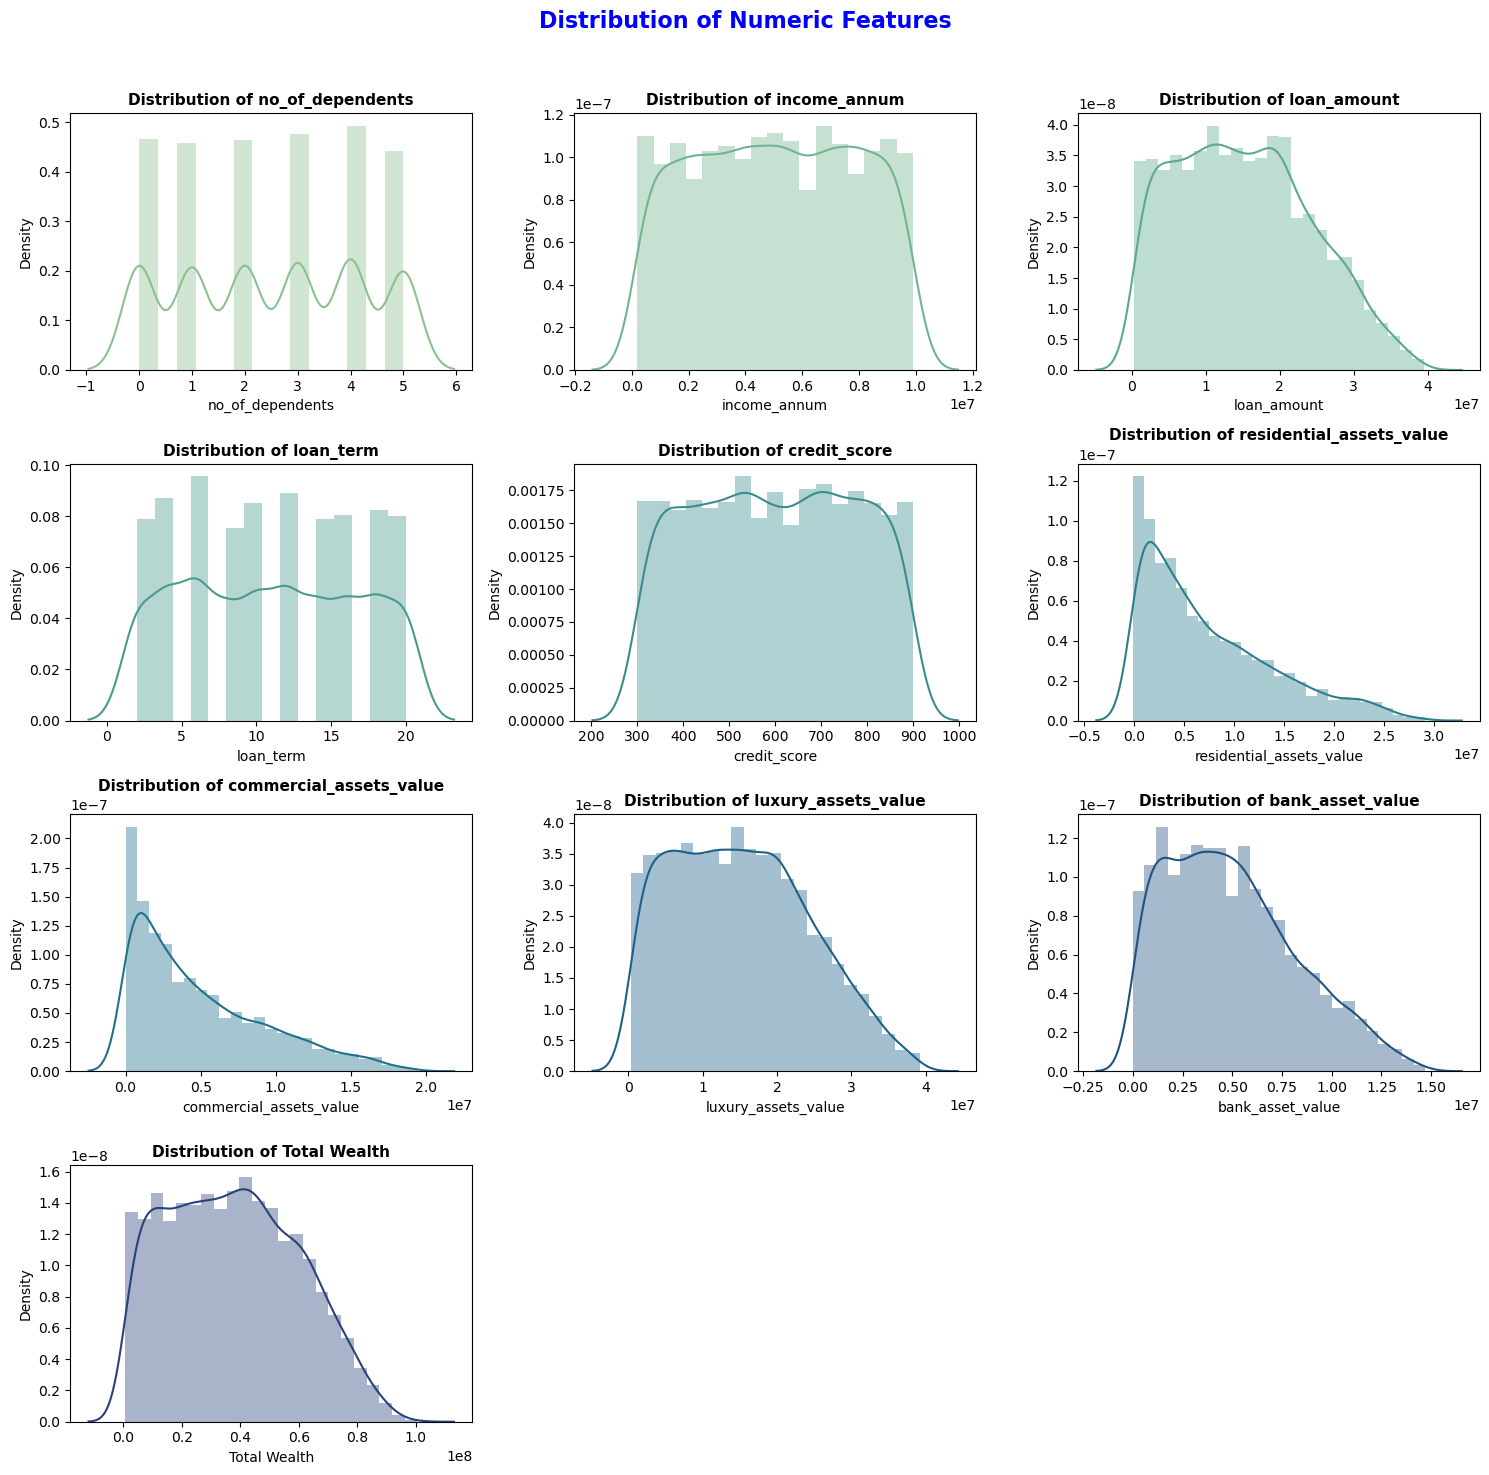

In [26]:
ncol = numeric_features.columns
palette = sns.color_palette("crest", len(ncol))
plt.figure(figsize=(15,15))

for i, col in enumerate(ncol,1):
    plt.subplot(4,3,i)
    sns.distplot(lndf[col], kde=True, color = palette[i-1])
    plt.title("Distribution of {}".format(col), fontsize=11, fontweight="bold", color="black")
    plt.tight_layout()
    
plt.suptitle("Distribution of Numeric Features", fontsize=16, fontweight="bold", color="blue")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

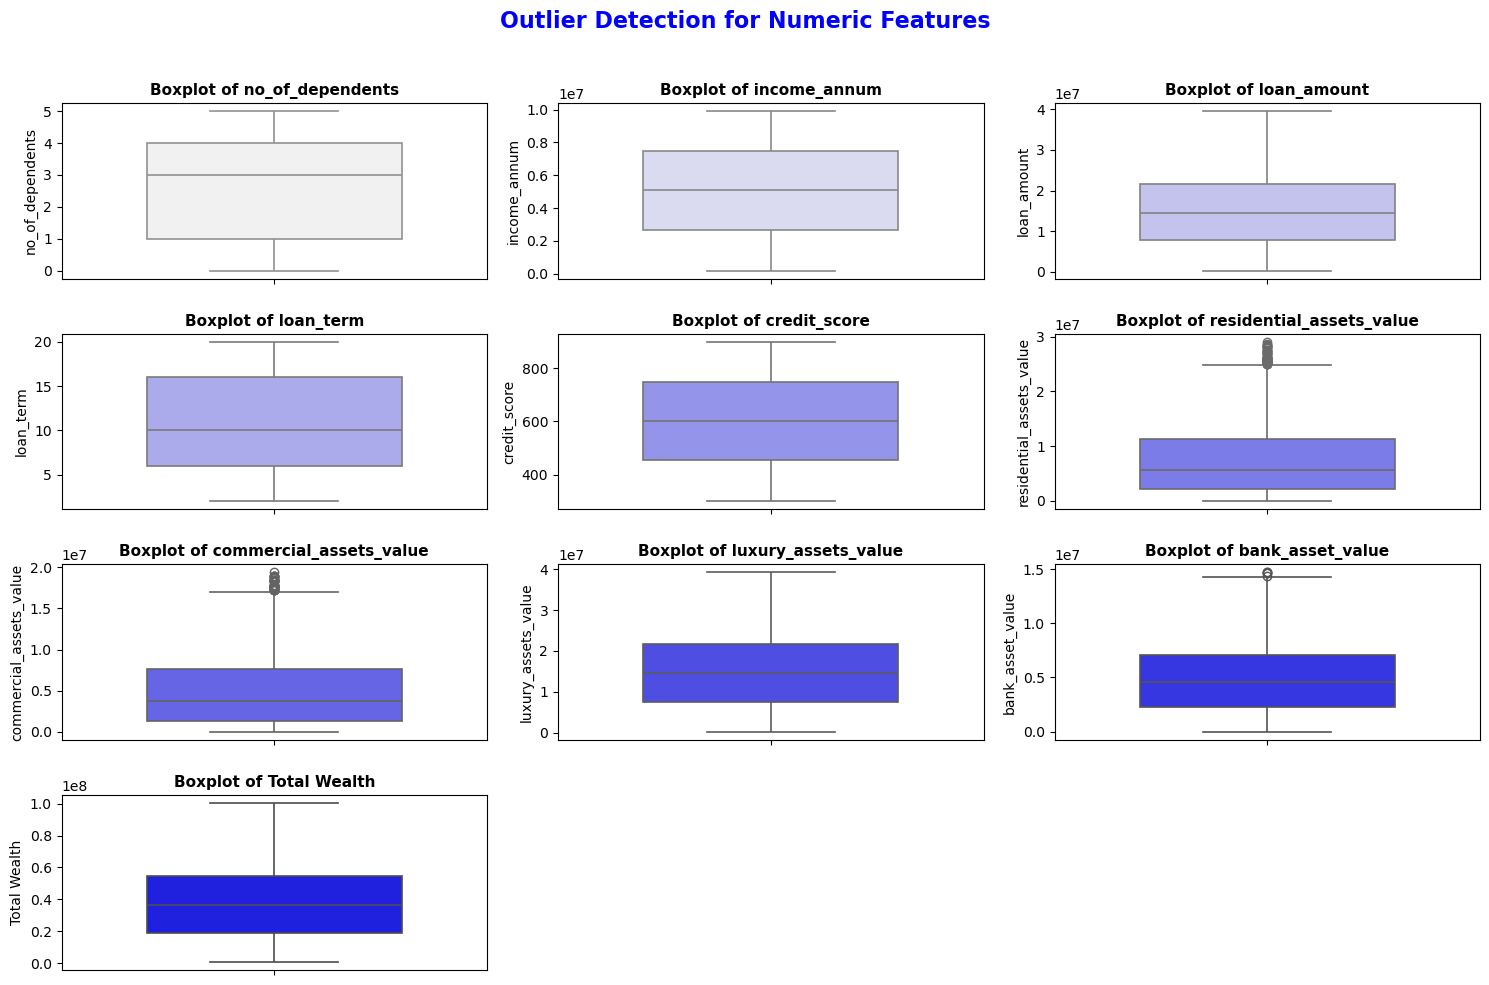

In [27]:
palette = sns.color_palette("light:b", len(ncol))
plt.figure(figsize=(15, 10))
for i, col in enumerate(ncol, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(
        y=lndf[col],
        color=palette[i-1],
        width=0.6,
        fliersize=6,  
        linewidth=1.2
    )
    plt.title(f"Boxplot of {col}", fontsize=11, fontweight="bold", color="black")
plt.suptitle("Outlier Detection for Numeric Features", fontsize=16, fontweight="bold", color="blue")
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

In [28]:
#Confirm outliers in dataset
def check_outliers(df, features): #Create a function for checkng outliers
    for item in features:
        Q1 = df[item].quantile(0.25)
        Q3 = df[item].quantile(0.75)
        IQR = Q3 - Q1
        min_threshold = Q1 - 1.5*IQR
        max_threshold = Q3 + 1.5*IQR
        outliers = df[(df[item]<min_threshold) | (df[item]>max_threshold)]
        print(f"{item} :{len(outliers)} outliers")

In [29]:
numeric_features =  lndf.select_dtypes(include=["int64", "float64"])
#numeric_features.drop(columns=["loan_id"],inplace=True)
check_outliers(lndf, numeric_features)

no_of_dependents :0 outliers
income_annum :0 outliers
loan_amount :0 outliers
loan_term :0 outliers
credit_score :0 outliers
residential_assets_value :52 outliers
commercial_assets_value :37 outliers
luxury_assets_value :0 outliers
bank_asset_value :5 outliers
Total Wealth :0 outliers


In [30]:
def remove_outliers(df,outliers):
    for cols in outliers:
        Q1 = df[cols].quantile(0.25)
        Q3 = df[cols].quantile(0.75)
        IQR = Q3 - Q1
        min_threshold = Q1 - 1.5*IQR
        max_threshold = Q3 + 1.5*IQR
        df[cols] = df[cols].clip(min_threshold, max_threshold) # clip outliers to upper and lower bound values
    return df

In [31]:
outlier_cols = ["residential_assets_value", "commercial_assets_value"] # Specify outliers with columns except bank assets because they are few
lndf = remove_outliers(lndf, outlier_cols) # Call outlier fuction on the dataframe

In [32]:
#Check again and verify that there are no outliers
check_outliers(lndf, numeric_features)

no_of_dependents :0 outliers
income_annum :0 outliers
loan_amount :0 outliers
loan_term :0 outliers
credit_score :0 outliers
residential_assets_value :0 outliers
commercial_assets_value :0 outliers
luxury_assets_value :0 outliers
bank_asset_value :5 outliers
Total Wealth :0 outliers


In [33]:
rm_col=lndf.columns[-5:] #columns to remove
lndf.drop(columns=rm_col,inplace=True)
lndf.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [34]:
le = LabelEncoder()
encode_col = ["education", "self_employed", "loan_status"]
for col in encode_col:
    lndf[col] = le.fit_transform(lndf[col])

In [35]:
lndf.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [36]:
X = lndf.drop(columns="loan_status") #features
y = lndf["loan_status"] #target 

#Split features into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42, stratify=y)


In [37]:
X.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'credit_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value'],
      dtype='object')

In [38]:
models = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), DecisionTreeClassifier()]
model_names = ['LogisticRegression', 'KNeighborsClassifier', 'RandomForestClassifier', 'DecisionTreeClassifier']
acc= []
prec=[]
recall = []
fscore = []
eva = {}
for model in range(len(models)):
    classification_model = models[model]
    classification_model.fit(X_train, y_train)
    pred = classification_model.predict(X_test)
    acc.append(accuracy_score(pred, y_test))
    prec.append(precision_score(pred, y_test))
    recall.append(recall_score(pred, y_test))
    fscore.append(f1_score(pred, y_test))
    print("\nClassification Report for {}\n".format(str(models[model])), classification_report(y_test, pred))
eva = {"Classification Model" : model_names, "Accuracy": acc, "Precision": prec, "Recall": recall, "F1 Score": fscore}

eva_table = pd.DataFrame(eva).sort_values("Accuracy", ascending = False)
eva_table
    


Classification Report for LogisticRegression()
               precision    recall  f1-score   support

           0       0.71      0.93      0.81       797
           1       0.78      0.38      0.51       484

    accuracy                           0.73      1281
   macro avg       0.75      0.66      0.66      1281
weighted avg       0.74      0.73      0.70      1281


Classification Report for KNeighborsClassifier()
               precision    recall  f1-score   support

           0       0.63      0.73      0.67       797
           1       0.39      0.29      0.33       484

    accuracy                           0.56      1281
   macro avg       0.51      0.51      0.50      1281
weighted avg       0.54      0.56      0.54      1281


Classification Report for RandomForestClassifier()
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       797
           1       0.98      0.96      0.97       484

    accuracy                 

,Classification Model,Accuracy,Precision,Recall,F1 Score
2,RandomForestClassifier,0.980484,0.964876,0.983158,0.973931
3,DecisionTreeClassifier,0.978142,0.964876,0.976987,0.970894
0,LogisticRegression,0.725995,0.382231,0.780591,0.513176
1,KNeighborsClassifier,0.559719,0.285124,0.387640,0.328571


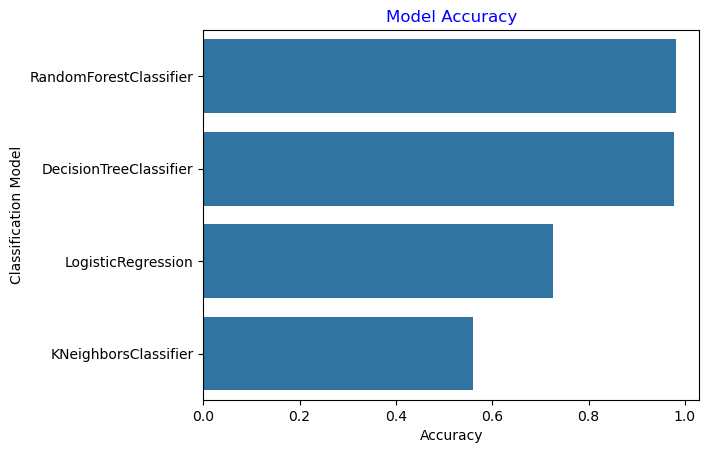

In [39]:
sns.barplot(y= "Classification Model" , x= "Accuracy", data=eva_table)
plt.title("Model Accuracy",color="blue")
plt.show()

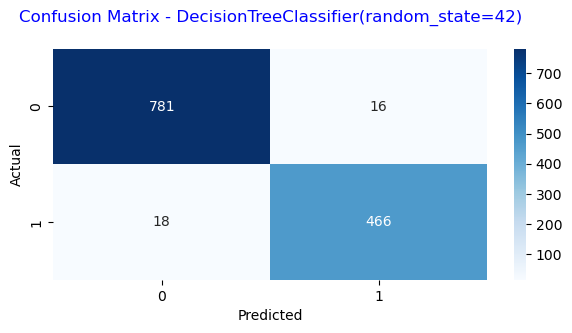

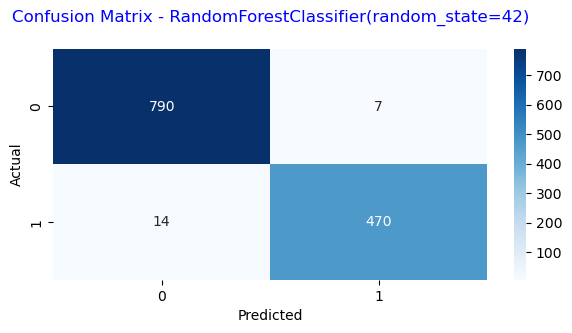

In [40]:
sel_models = [DecisionTreeClassifier(random_state = 42),RandomForestClassifier(random_state=42)]
for model in range(len(sel_models)):
    classification_model = sel_models[model]
    classification_model.fit(X_train, y_train)
    pred = classification_model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(7,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix - {}\n'.format(str(sel_models[model])),color="blue")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

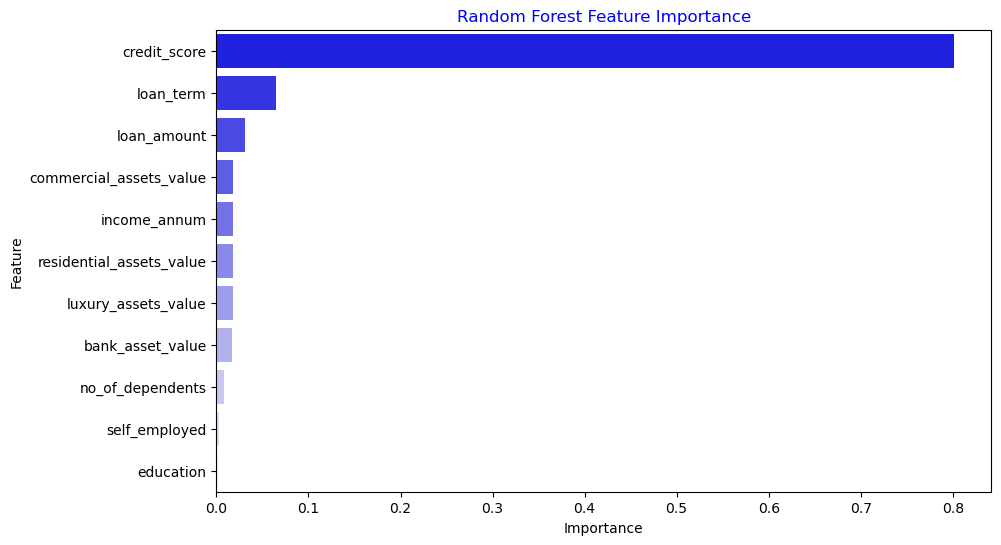

In [41]:
fea_imp = pd.DataFrame({"Feature":X_train.columns, "Importance":classification_model.feature_importances_}).sort_values("Importance",ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=fea_imp, palette='light:b_r')
plt.title('Random Forest Feature Importance',color="blue")
#plt.savefig("Featureimp.png")
plt.show()

In [42]:
selected_model = RandomForestClassifier(random_state=42)
selected_model.fit(X_train, y_train)
prediction = selected_model.predict(X_test)

In [43]:
import joblib
#joblib.dump(selected_model,"loan_approval.pkl")

In [45]:
lndf

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17050000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0
